  # Economic Inequality by Gender - Good, Bad & The Ugly Truths

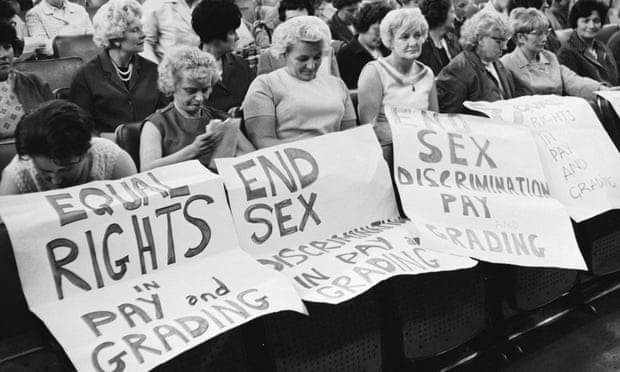
Pic Credit - [The Guardian](https://www.theguardian.com/)

We are all aware of `Gender Pay Gap`. It comes up often in [political debates](https://www.nbcnews.com/politics/2020-election/live-blog/nov-20-democratic-debate-live-updates-n1087226/ncrd1088011#liveBlogHeader), [Policy reports](https://siteresources.worldbank.org/INTWDR2012/Resources/7778105-1299699968583/7786210-1315936222006/Complete-Report.pdf) and [everyday News](https://www.ksl.com/article/46681609/unaffordable-utah-fixing-the-uss-worst-gender-pay-gap).

According to New report by [Fawcett Society](https://www.fawcettsociety.org.uk/why-women-need-a-right-to-know-shining-a-light-on-pay-discrimination) : -
> Fifty years on from the Equal Pay Act 1970, women are still fighting to make equal pay a reality. Far from this battle being won, women are routinely unaware of what their colleagues earn, and therefore unable to secure equal pay. From supermarkets and councils to broadcasters and catering companies, men are still being paid more for the same work, work rated as equivalent, or work of equal value.


# Objectives - 
The study from various organizations in the past has shown that there is an Economic Inequality in Pay based on Gender. But I am Interested to know if it also exist in Machine Learning and Data Science community or not? We will
ask series of questions and keep segmenting the data again and again to find the real truth. I invite you to come along with me to find it out. 

Let's begin.

# Question 1. Is there is a difference in compensation based on Gender?
Let's first look at an aggregated level to see if there is a difference in compensation based on Gender.

In [ ]:
# Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
# to show all the columns
pd.options.display.max_columns=999 

# Import the 2019 dataset 
df_2019 = pd.read_csv('../input/kaggle-survey-2019/multiple_choice_responses.csv', low_memory=False)
# assign the first row as column 
df_2019.columns = df_2019.iloc[0]
# Now drop the first row 
df_2019=df_2019.drop([0])

# Replacing the ambigious countries name with Standard names
df_2019['In which country do you currently reside?'].replace(
                                                   {'United States of America':'United States',
                                                    'Viet Nam':'Vietnam',
                                                    "People 's Republic of China":'China',
                                                    "United Kingdom of Great Britain and Northern Ireland":'United Kingdom',
                                                    "Hong Kong (S.A.R.)":"Hong Kong"},inplace=True)

# create a mapping of the long column names that we are going to 
# use for our analysis
col_rename_dict_2019 = {'What is your age (# years)?': 'Age',
                  'What is your gender? - Selected Choice':'Gender',
                  'In which country do you currently reside?': 'Country',
                  'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?':'Highest Education',
                  'Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'Current Role',
                  'What is your current yearly compensation (approximate $USD)?': 'Yearly Compensation',
                  'What is the size of the company where you are employed?': 'Company Size',
                  'Approximately how many individuals are responsible for data science workloads at your place of business?':'Team Size'}

# Rename the columns 
df_2019.rename(columns=col_rename_dict_2019, inplace=True)

# create a new column to turn 25 compensation categories to 5 sub-categories
mapping_dict = {
    '$0-999':'Very Low Wage',
        '1,000-1,999':'Very Low Wage',
        '2,000-2,999':'Very Low Wage',
        '3,000-3,999': 'Very Low Wage',
        '4,000-4,999': 'Very Low Wage',
        '5,000-7,499': 'Low Wage',
        '7,500-9,999': 'Low Wage',
        '10,000-14,999':'Low Wage',
        '15,000-19,999':'Low Wage',
        '20,000-24,999': 'Low Wage',
        '25,000-29,999': 'Medium Wage',
        '30,000-39,999': 'Medium Wage',
        '40,000-49,999':'Medium Wage',
        '50,000-59,999':'Medium Wage',
        '60,000-69,999':'Medium Wage',
        '70,000-79,999':'High Wage',
        '80,000-89,999':'High Wage',
        '90,000-99,999':'High Wage',
        '100,000-124,999':'High Wage',
        '125,000-149,999':'High Wage',
        '150,000-199,999':'Very High Wage',
        '200,000-249,999':'Very High Wage',
        '250,000-299,999':'Very High Wage',
        '300,000-500,000':'Very High Wage',
        '> $500,000':'Very High Wage'
}

df_2019['Yearly Compensation Category'] = df_2019['Yearly Compensation'].map(mapping_dict)

# Mapping Higher Education
mapping_dict = {
    'Highest Education':{
        'Some college/university study without earning a bachelor’s degree':'Some college/university',
        'No formal education past high school':'High School'
    }
}

df_2019 = df_2019.replace(mapping_dict)


# Only select the columns that we need for our analysis
df_2019_subset = df_2019[['Country','Gender','Age','Highest Education','Current Role','Yearly Compensation',
                          'Yearly Compensation Category','Company Size','Team Size']]

# select only the rows where gender is Female or Male
female_male_2019 = df_2019_subset[(df_2019_subset['Gender']=='Female')| (df_2019_subset['Gender']=='Male')]

# Create a two way table 
comp_pivot = female_male_2019.pivot_table(index='Gender',columns='Yearly Compensation Category', aggfunc='size')
# calculate conditional percentage 
comp_cond_perc = comp_pivot.apply(lambda x: round(x/ comp_pivot.sum(axis=1)*100, 2))
# reset the index
comp_cond_perc.reset_index(inplace=True)

# Melt the columns to tidy the data 
comp_cond_perc = comp_cond_perc.melt(id_vars=['Gender'],var_name='Yearly Compensation Category', value_name='Percentages')

# create a list according to which we want the data to be plotted
order_list = ['Very Low Wage','Low Wage','Medium Wage','High Wage','Very High Wage']

# create the plot 
g = sns.catplot(x="Yearly Compensation Category", y="Percentages", hue="Gender", data=comp_cond_perc,
                kind="bar", order=order_list, height=7, aspect=1.2, palette='muted')
plt.title('Yearly Compensation 2019 By Gender', fontsize=17)
g.set_axis_labels(y_var="Conditional Percentages");

### Reflection - 

  * Out of the all the respondents in this survey, we can see that maximum Percentage of Females are in the `Very Low Wage` Category. And in all other categories Males are dominating.

# Question 2. Is It also True Across Different Countries? 
Let's first look at the top 6 countries. 

In [ ]:
# create a list of top 6 countries
top_6_country_list= list(female_male_2019['Country'].value_counts()[:6].index )
# select only the data for these countries
top_6_country_data = female_male_2019[female_male_2019['Country'].isin(top_6_country_list)]

# Create a two way table 
comp_pivot_country = top_6_country_data.pivot_table(index=['Country','Gender'], 
                                                     columns='Yearly Compensation Category', aggfunc='size').fillna(0)

# calculate conditional percentage 
comp_cond_perc = comp_pivot_country.apply(lambda x: round(x/ comp_pivot_country.sum(axis=1)*100, 2))
# reset the index
comp_cond_perc.reset_index(inplace=True)
# tidy the data 
comp_cond_perc = comp_cond_perc.melt(id_vars=['Country','Gender'],
                                     var_name='Yearly Compensation Category', value_name='Percentages')

# Plot the data 
g = sns.catplot(x="Yearly Compensation Category", y="Percentages", hue="Gender", data=comp_cond_perc,
                kind="bar", order=order_list, col='Country',col_wrap=2,palette='muted',aspect=1.1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Yearly Compensation 2019 Top 6 Countries', fontsize=17) 
g.set_axis_labels(y_var="Conditional Percentages");

### Reflections - 

* In Countries like `Brazil`, `India`, `Russia`, overall the pattern is same, Maximum percentage of Females in 
  the low wage categories and the upper categories are dominated by Males except some difference in Brazil where we can see the       percentage of females in `Medium wage` category is slightly higher here.
* In `Japan` And `USA`, there is slight difference. In Japan, we can see that actually the percentage of female in 
  `Very High Wage` is slightly higher than male but the difference is almost negligible and in USA females in `High Wage`category is higher than males. Then again `very High wage` category is dominated by Males.

# Question 3. What about Types of Profession? 

In [ ]:
comp_pivot = female_male_2019.pivot_table(index=['Gender','Current Role'], 
                                          columns='Yearly Compensation Category', aggfunc='size')
comp_cond_perc = comp_pivot.apply(lambda x: round(x/comp_pivot.sum(axis=1)*100, 2))
comp_cond_perc.reset_index(inplace=True)
comp_cond_perc = comp_cond_perc.melt(id_vars=['Gender','Current Role'], 
                                     var_name='Yearly Compensation Category', value_name='Percentages')
g = sns.catplot(x='Yearly Compensation Category', y='Percentages', hue='Gender', data=comp_cond_perc,
               kind='bar',order=order_list, col='Current Role', col_wrap=2, palette='muted',aspect=1.1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Yearly Compensation 2019 By Profession', fontsize=17)
g.set_axis_labels(y_var="Conditional Percentages");

### Reflections

* There is some good news for Females in `DBA/Database Engineer` and `Data Analyst` Profession Where the percentages 
    of females in the `High wage`(fourth category) is higher than Males.
* Also in `Statistician` where percentages of female in `Very High Wage` category are higher but the worst is also in this profession. The percentage of females in `very low wage` is highest among all the profession.
* Otherwise, in other Professions the results are same.

# Question 4. How Fair are the Big and Small Companies? 

In [ ]:
comp_pivot = female_male_2019.pivot_table(index=['Gender','Company Size'], 
                                          columns='Yearly Compensation Category', aggfunc='size')
comp_cond_perc = comp_pivot.apply(lambda x: round(x/comp_pivot.sum(axis=1)*100, 2))
comp_cond_perc.reset_index(inplace=True)
comp_cond_perc = comp_cond_perc.melt(id_vars=['Gender','Company Size'], 
                                     var_name='Yearly Compensation Category', value_name='Percentages')

g = sns.catplot(x='Yearly Compensation Category', y='Percentages', hue='Gender', data=comp_cond_perc,
               kind='bar',order=order_list, col='Company Size', col_wrap=2, palette='muted',aspect=1.1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Yearly Compensation 2019 By Company Size', fontsize=17)
g.set_axis_labels(y_var="Conditional Percentages");

### Reflections - 

* There is a little hope in Very Big companies for Women Where the company size is `bigger than 10,000 employees`. Otherwise, results are not in Favor of women here also. 

# Question 5. IS there a difference in compensation across different Age?

In [ ]:
comp_pivot = female_male_2019.pivot_table(index=['Gender','Age'], 
                                          columns='Yearly Compensation Category', aggfunc='size')
comp_cond_perc = comp_pivot.apply(lambda x: round(x/comp_pivot.sum(axis=1)*100, 2))
comp_cond_perc.reset_index(inplace=True)
comp_cond_perc = comp_cond_perc.melt(id_vars=['Gender','Age'], 
                                     var_name='Yearly Compensation Category', value_name='Percentages')

g = sns.catplot(x='Yearly Compensation Category', y='Percentages', hue='Gender', data=comp_cond_perc,
               kind='bar',order=order_list, col='Age', col_wrap=3, palette='muted',aspect=1.1)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Yearly Compensation 2019 Based On Age', fontsize=17)
g.set_axis_labels(y_var="Conditional Percentages");

Let's dig a little bit to find more insights.

In [ ]:
# Female 25-29 in the very high wage category
female_25_29_very_high = female_male_2019[(female_male_2019['Gender']=='Female') & (
    female_male_2019['Age']=='25-29') & (female_male_2019['Yearly Compensation Category']=='Very High Wage')]
female_25_29_very_high

Most of the females are from united states, they are Data scientists and work in bigger companies.

In [ ]:
# Female age between 55-59 and high wage 
female_55_59_high_wage = female_male_2019[(female_male_2019['Gender']=='Female') & (
    female_male_2019['Age']=='55-59') & (female_male_2019['Yearly Compensation Category']=='High Wage')]
female_55_59_high_wage

There isn't look like any pattern here. 

### Reflections - 
* Out of respondents in this survey, Percentages of females here and there are slightly higher than males.
* But the striking difference is in the category where female age is `25-29` and `55-59`. In the `55-59` category the percentage of much higher in the `High Wage` though not in the `Very High Wage`. But in the `25-29` age category, females leading in both the `High Wage` and `Very High wage` category. In Which Most of the females are from united states, they are Data scientists and work in bigger companies.
* Otherwise, It is still Male dominated world.

# Question 6. Can We At least Expect Fairness in pay based on Education?

In [ ]:
comp_pivot = female_male_2019.pivot_table(index=['Gender','Highest Education'], 
                                          columns='Yearly Compensation Category', aggfunc='size')
comp_cond_perc = comp_pivot.apply(lambda x: round(x/comp_pivot.sum(axis=1)*100, 2))
comp_cond_perc.reset_index(inplace=True)
comp_cond_perc = comp_cond_perc.melt(id_vars=['Gender','Highest Education'], 
                                     var_name='Yearly Compensation Category', value_name='Percentages')
g = sns.catplot(x='Yearly Compensation Category', y='Percentages', hue='Gender', data=comp_cond_perc,
               kind='bar',order=order_list, col='Highest Education', col_wrap=2, palette='muted',aspect=1.1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Yearly Compensation 2019 Based On Education', fontsize=17)
g.set_axis_labels(y_var="Conditional Percentages");

### Reflection - 

* The Results can't get more worse than this. Based on Highest Education, there isn't a single place where females
    are leading.In every place there are paid less than Males.

# Conclusion - 

Although, we can not say that this sample data is true representative of the population but our results are consistent with what [others have found](https://www.fawcettsociety.org.uk/why-women-need-a-right-to-know-shining-a-light-on-pay-discrimination). 

From our Analysis, the overall results are - 

* Yes, Gender Pay Gap exists even in the Fields of Machine Learning And Data Science.
* All over the world Males tends to earn more than Females.
* Females are often underrepresented in high paying jobs.
* And Females are often overrepresented in low-paying jobs.
* There are some places we find some hope which are in favor of Females. Like Females who are from Japan and USA(only top 6 countries analyzed) particularly females in USA in their twenties who work as a Data Scientists in Bigger companies. And some Females who works as a `DBA/Database Engineer`,`Data Analyst` (not limited to only top 6 countries). 

I hope this analysis shed some lights on the pain that women goes through and inspire us to take it seriously and 
start a conversation in our own companies to fix it. 

Thanks for reading the analysis. I am very grateful that you took some time out of your busy schedule to read it. 